### This solution uses and compares 3 models for the classification of fetal health.

* K-Nearest neighbours: 90% accuracy
* Naive Bayes classifier: 84.5% accuracy
* Decision Tree classifier: 93% accuracy

In [13]:
import numpy as np # for mathematical operations
import pandas as pd # for data processing and analysis
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization
import warnings # to ignore warnings
warnings.filterwarnings('ignore')

## Reading and processing data:

In [14]:
df= pd.read_csv('fetal_health.csv')
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [15]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [16]:
df.shape

(2126, 22)

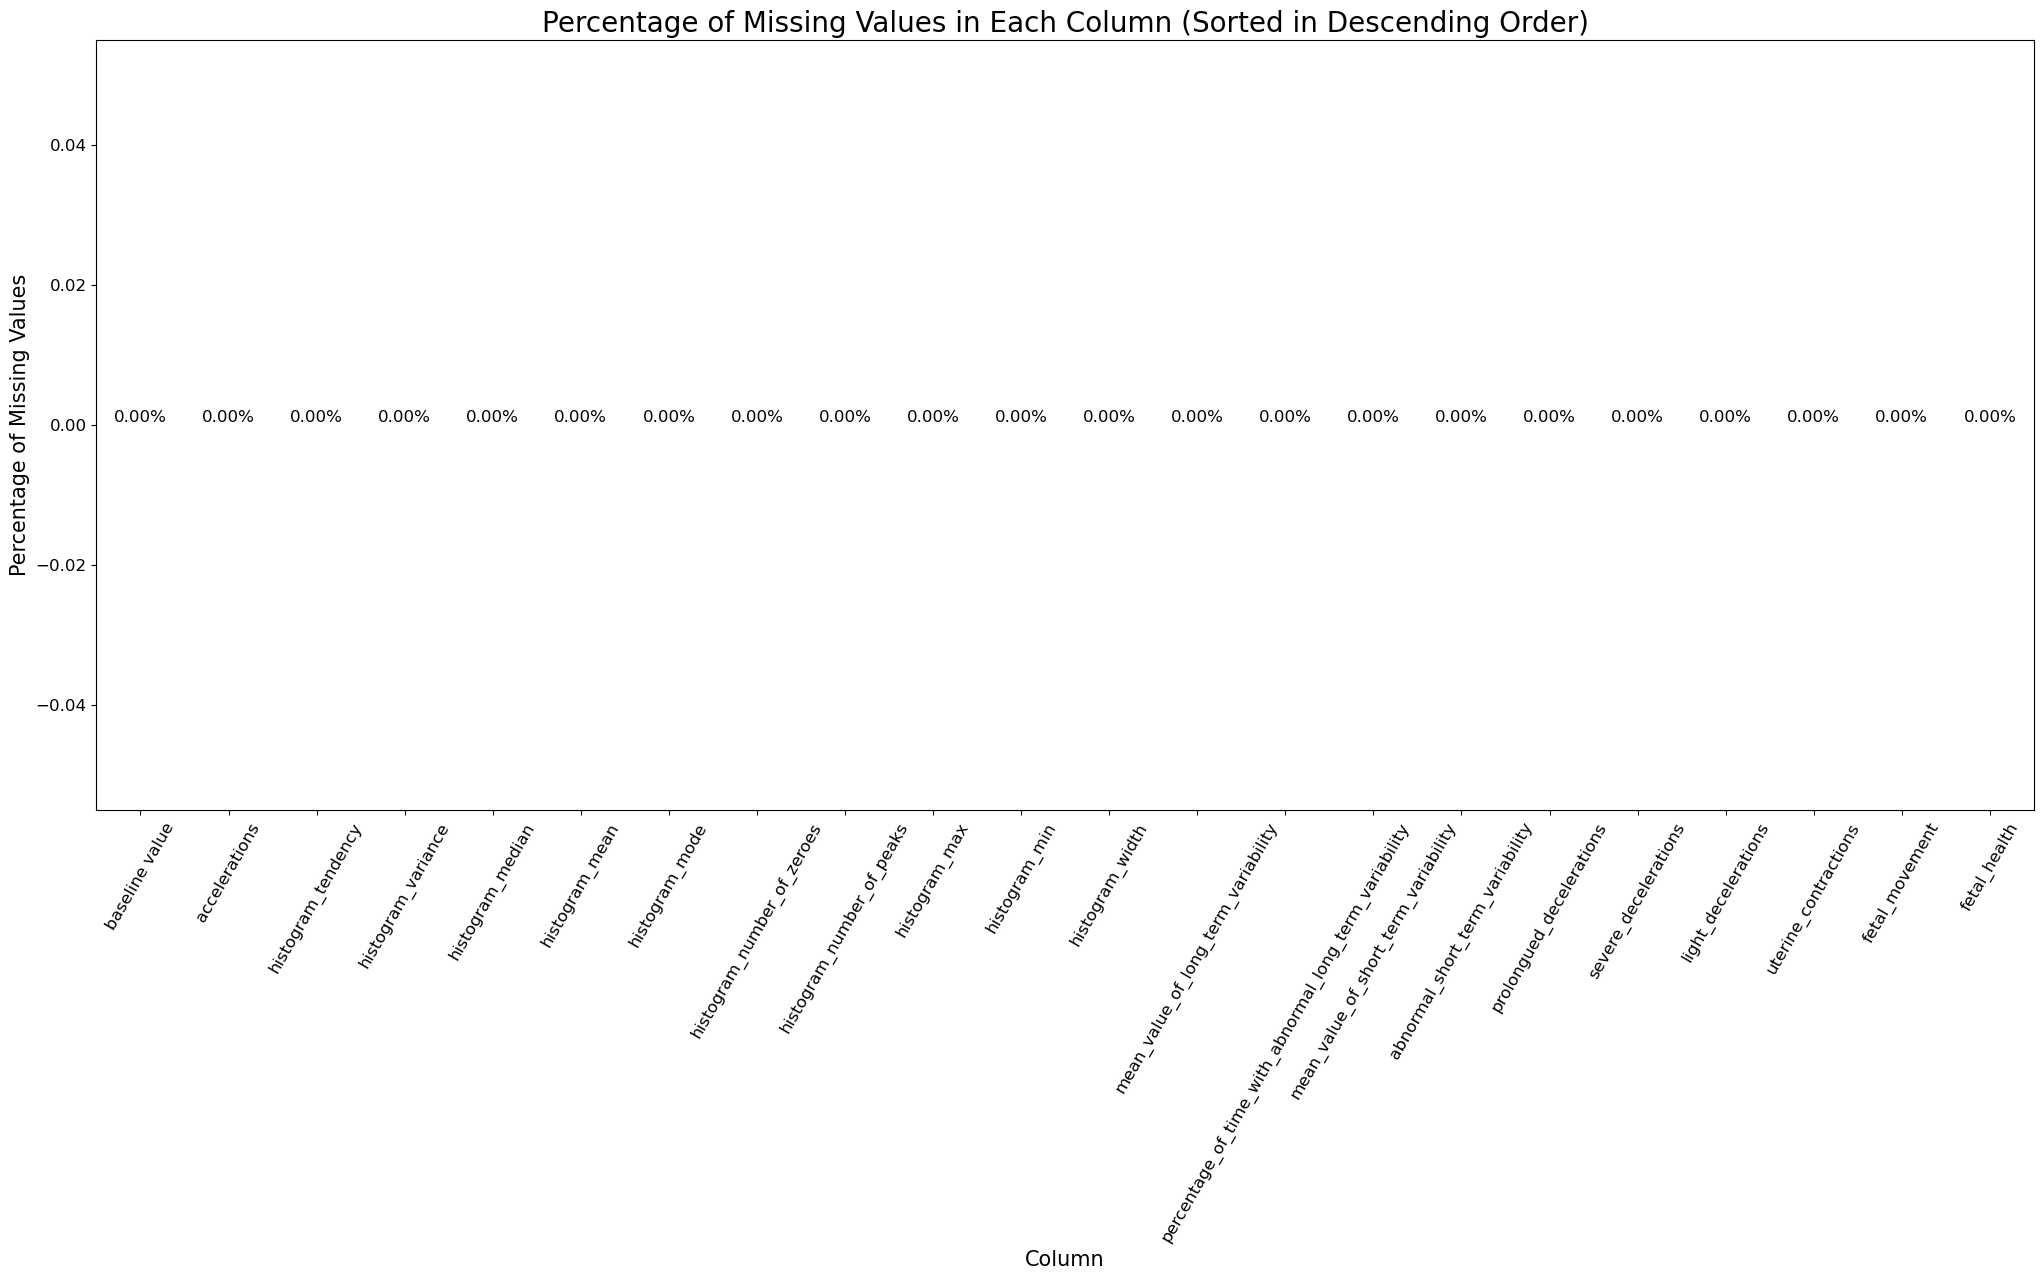

In [17]:
def plot_missing_values_bar(df):
    plt.figure(figsize=(25, 10))
    missing_values = df.isnull().mean().sort_values(ascending=False)
    missing_values.plot(kind='bar', color='blue')
    plt.title("Percentage of Missing Values in Each Column (Sorted in Descending Order)", fontsize=20)
    plt.xlabel("Column", fontsize=15)
    plt.ylabel("Percentage of Missing Values", fontsize=15)
    plt.xticks(rotation=60, fontsize=12)
    plt.yticks(fontsize=12)

    for i in range(df.shape[1]):
        plt.text(x=i, y=missing_values[i], s='{:.2f}%'.format(100*missing_values[i]), ha='center', va='bottom', fontsize=12)
    
plot_missing_values_bar(df) #plotting


In [18]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

## Identifying target variable:

In [19]:
y = df['fetal_health']
X_data = df.drop(['fetal_health'], axis=1)

## Feature selection:
Using 1) Pearsons correlation and 2) KBest feature selection

#### 1) Pearsons correlation:

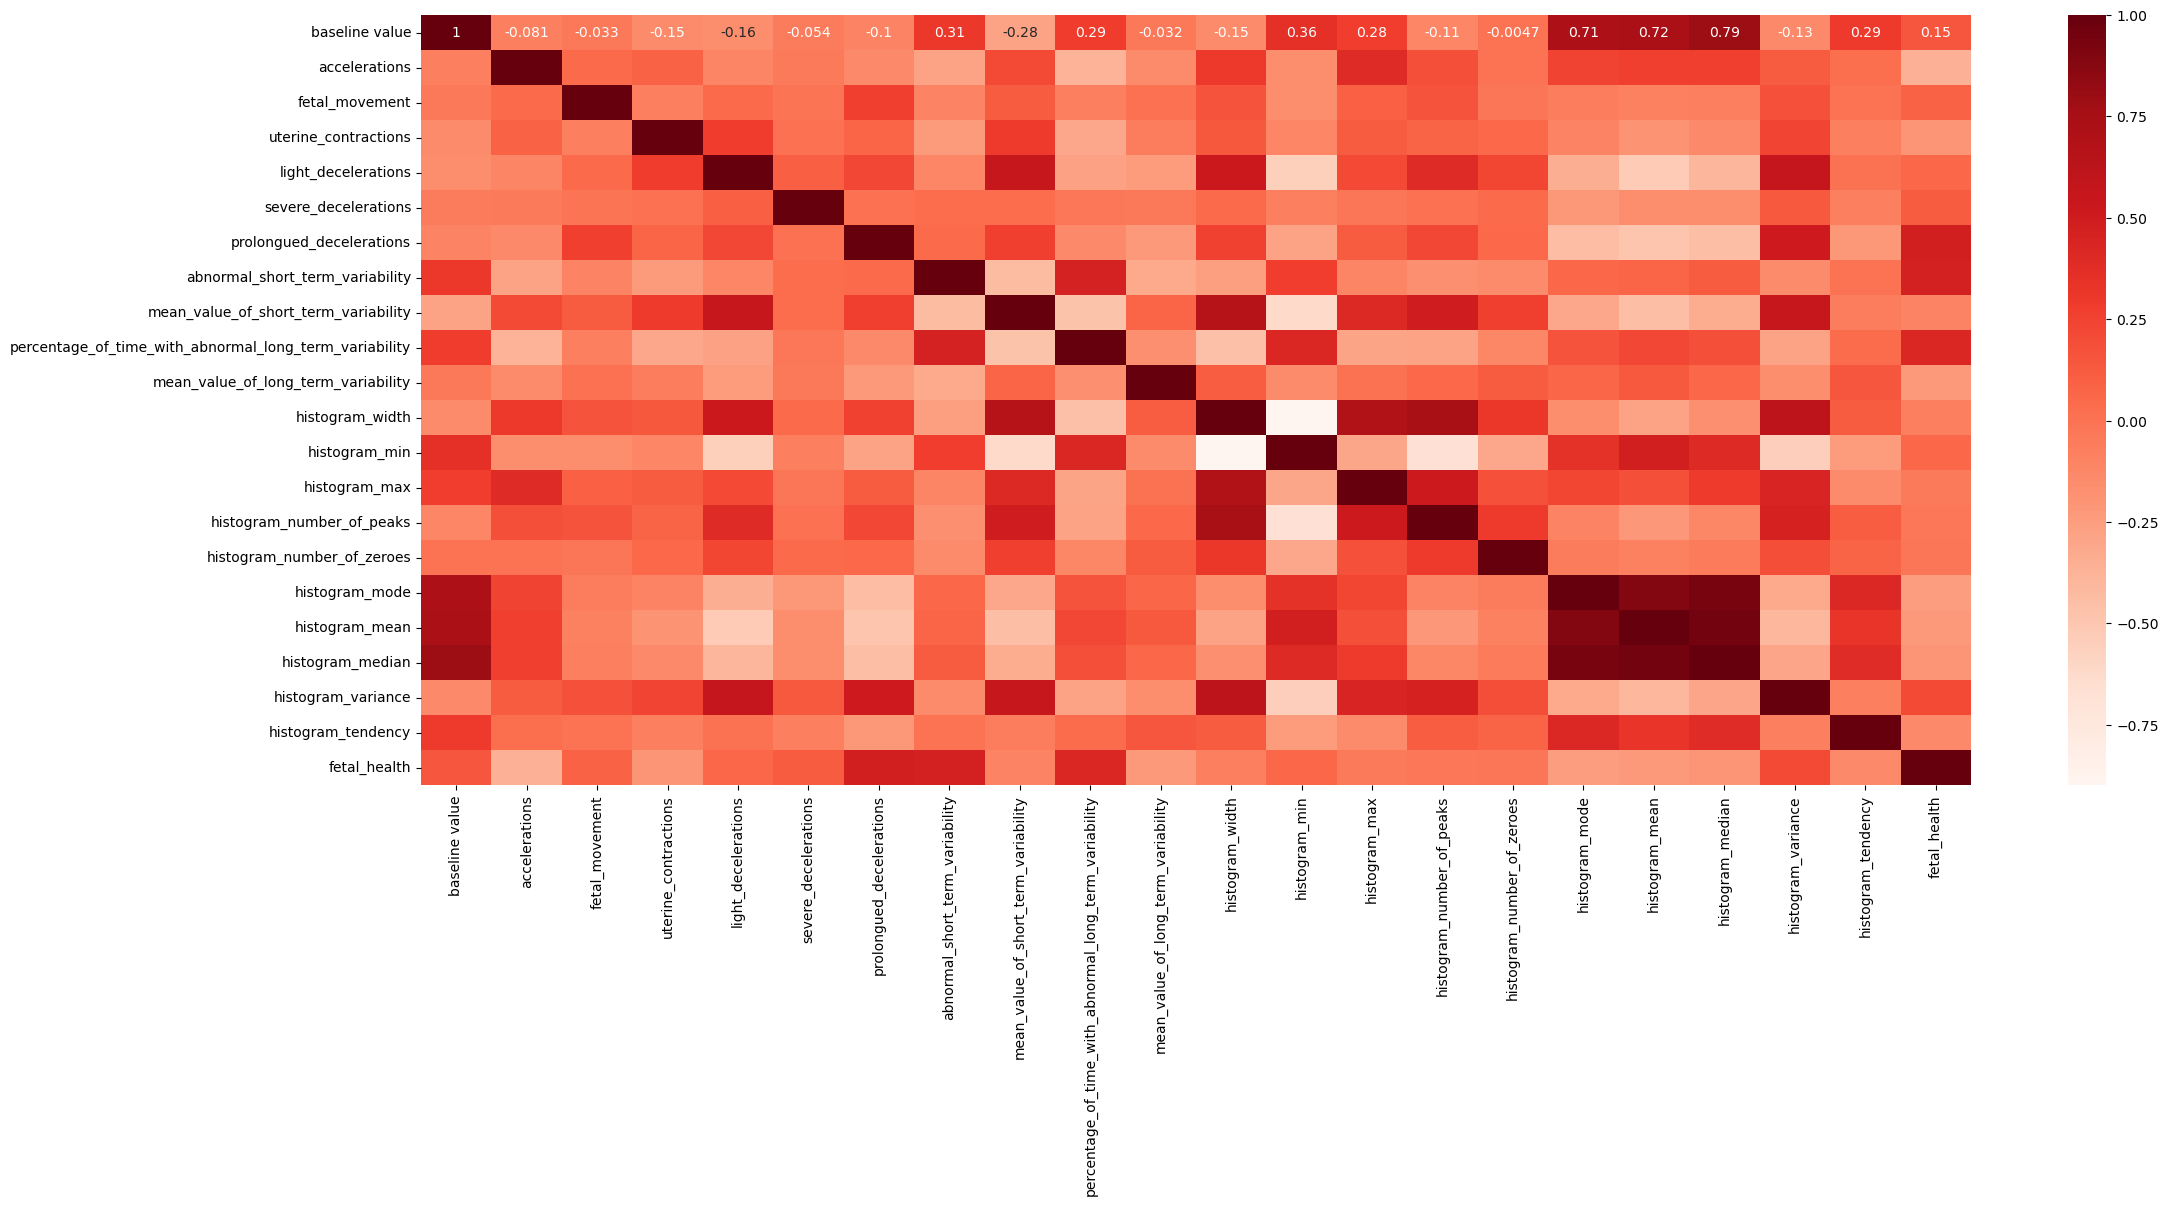

In [20]:
#Using Pearson Correlation
plt.figure(figsize=(25,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [21]:
cor_target = abs(cor["fetal_health"])
relevant_features = cor_target[cor_target > 0.3]
relevant_features = relevant_features.index.tolist()
relevant_features

['accelerations',
 'prolongued_decelerations',
 'abnormal_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'fetal_health']

#### 2) KBest- Features:

In [22]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=8)
X_important = selector.fit_transform(X_data, y)
mask = selector.get_support()
important_feature_names = X_data.columns[mask]

print(important_feature_names)

Index(['accelerations', 'prolongued_decelerations',
       'abnormal_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'histogram_mode', 'histogram_mean', 'histogram_median',
       'histogram_variance'],
      dtype='object')


## Visualizing target variable:

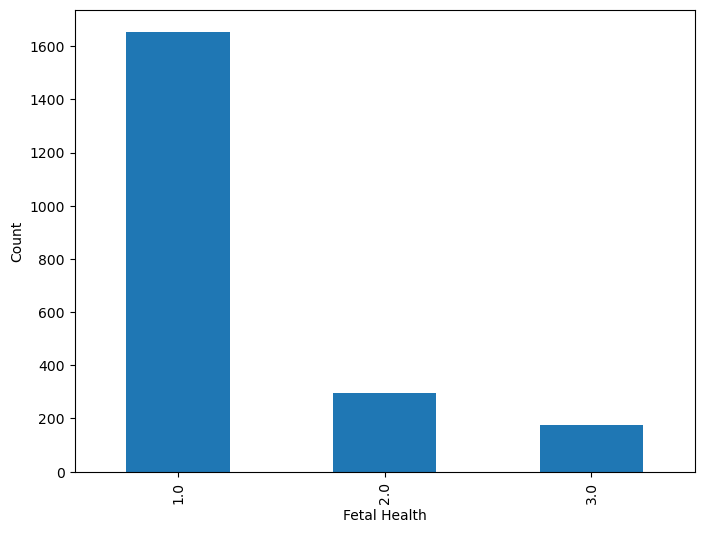

In [23]:
plt.figure(figsize=(8,6))
df['fetal_health'].value_counts().plot(kind='bar')
plt.title("")
plt.xlabel("Fetal Health")
plt.ylabel("Count")
plt.show()

## Modifying our data to only keep the selected features:

In [24]:
y = df['fetal_health']

X = df.drop(['baseline value', 'fetal_movement', 'uterine_contractions',    
                       'light_decelerations', 'severe_decelerations',
                       'mean_value_of_short_term_variability', 
                       'mean_value_of_long_term_variability',
                       'histogram_width',     
                       'histogram_min',
                       'histogram_max', 'histogram_number_of_peaks',    
                       'histogram_number_of_zeroes', 'histogram_tendency', 
                       'fetal_health'],1)



TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

In [ ]:
X

,accelerations,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_mode,histogram_mean,histogram_median,histogram_variance
0,0.000,0.0,73.0,43.0,120.0,137.0,121.0,73.0
1,0.006,0.0,17.0,0.0,141.0,136.0,140.0,12.0
2,0.003,0.0,16.0,0.0,141.0,135.0,138.0,13.0
3,0.003,0.0,16.0,0.0,137.0,134.0,137.0,13.0
4,0.007,0.0,16.0,0.0,137.0,136.0,138.0,11.0
...,...,...,...,...,...,...,...,...
2121,0.000,0.0,79.0,25.0,153.0,150.0,152.0,2.0
2122,0.001,0.0,78.0,22.0,152.0,148.0,151.0,3.0
2123,0.001,0.0,79.0,20.0,153.0,148.0,152.0,4.0
2124,0.001,0.0,78.0,27.0,152.0,147.0,151.0,4.0


In [ ]:
y

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: fetal_health, Length: 2126, dtype: float64

## Splitting the data into train and test sets:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

## Building and evaluating our models:

### 1. KNN - 90.1%

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))
print("Accuracy:", accuracy)


              precision    recall  f1-score   support

         1.0       0.93      0.96      0.94       335
         2.0       0.67      0.62      0.65        53
         3.0       0.94      0.79      0.86        38

    accuracy                           0.90       426
   macro avg       0.85      0.79      0.82       426
weighted avg       0.90      0.90      0.90       426

Accuracy: 0.9014084507042254


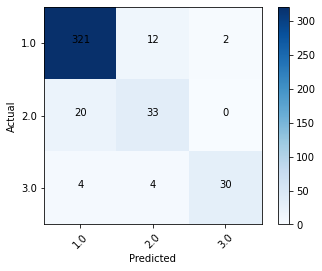

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i,j]), horizontalalignment="center", color="black")

tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 2) Naive Bayes -  84.5%

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_nb)
print(classification_report(y_test,y_pred_nb))
print("Accuracy:", accuracy)


              precision    recall  f1-score   support

         1.0       0.97      0.87      0.92       335
         2.0       0.48      0.75      0.59        53
         3.0       0.69      0.76      0.72        38

    accuracy                           0.85       426
   macro avg       0.71      0.80      0.74       426
weighted avg       0.88      0.85      0.86       426

Accuracy: 0.8450704225352113


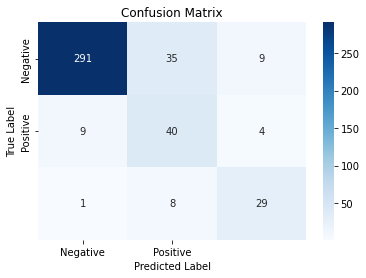

In [ ]:
cm1 = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm1, annot=True, cmap="Blues", fmt="d", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Decision Tree- 92.9%

In [ ]:
print(X_train.head(3))

      accelerations  prolongued_decelerations  \
1211          0.000                       0.0   
1095          0.012                       0.0   
616           0.015                       0.0   

      abnormal_short_term_variability  \
1211                             61.0   
1095                             22.0   
616                              41.0   

      percentage_of_time_with_abnormal_long_term_variability  histogram_mode  \
1211                                               34.0                142.0   
1095                                                0.0                131.0   
616                                                 0.0                157.0   

      histogram_mean  histogram_median  histogram_variance  
1211           140.0             142.0                 0.0  
1095           132.0             133.0                 4.0  
616            162.0             164.0                13.0  


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_dtc)
print(classification_report(y_test,y_pred_dtc))
print("Accuracy:", accuracy)


              precision    recall  f1-score   support

         1.0       0.96      0.95      0.96       335
         2.0       0.75      0.79      0.77        53
         3.0       0.90      0.92      0.91        38

    accuracy                           0.93       426
   macro avg       0.87      0.89      0.88       426
weighted avg       0.93      0.93      0.93       426

Accuracy: 0.9295774647887324


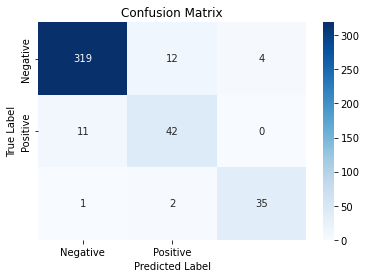

In [ ]:
cm2 = confusion_matrix(y_test, y_pred_dtc)
sns.heatmap(cm2, annot=True, cmap="Blues", fmt="d", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
import joblib
joblib.dump(dtc,"fetusmodel.pkl")

['fetusmodel.pkl']